## Exploring Iris Dataset ##

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

# Read csv using pandas
df = pd.read_csv('../input/Iris.csv')


# Print four first rows 
print(df.head())
print('_____________________________________\n')
# Print last four rows
print(df.tail())
print('_____________________________________\n')
#Print info detail to check missing values
print(df.info())
print('_____________________________________\n')
# Get statistical summary of the dataset
print(df.describe())
print('_____________________________________\n')

# Means of each feature depending on Species
print(df[['Species','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].groupby('Species').mean())

Iris.csv
database.sqlite

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
_____________________________________

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iri

## Data Visualization ##

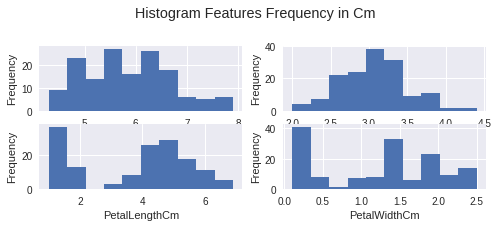

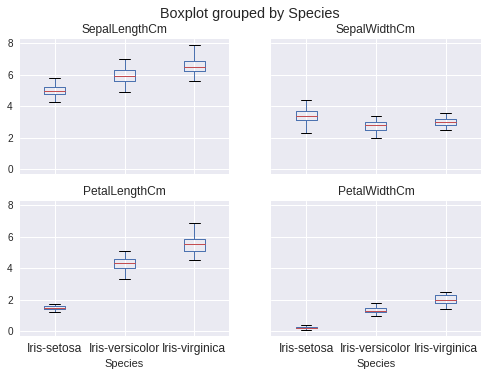

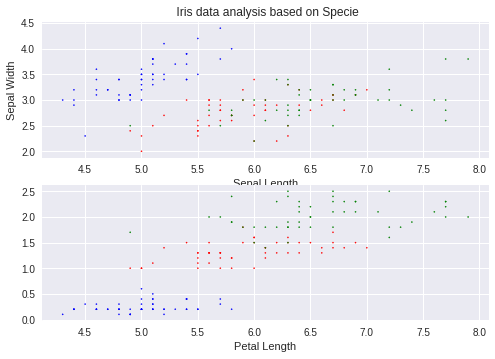

In [2]:
## Visual Exploratory data analysis
plt.figure(1)
plt.suptitle('Histogram Features Frequency in Cm')
plt.subplot(421)
df['SepalLengthCm'].plot('hist')
plt.xlabel('SepalLengthCm')
plt.subplot(422)
df['SepalWidthCm'].plot('hist')
plt.xlabel('SepalWidthCm')
plt.subplot(423)
df['PetalLengthCm'].plot('hist')
plt.xlabel('PetalLengthCm')
plt.subplot(424)
df['PetalWidthCm'].plot('hist')
plt.xlabel('PetalWidthCm')
plt.show()
plt.clf()

# Box plot by Species
df.boxplot(column=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],by='Species')
plt.show()
plt.clf()

# Plot dataset based on Species
def typeSpecie(s) :
    colors = {'Iris-setosa':'blue','Iris-versicolor':'red','Iris-virginica':'green'}
    return colors[s]

plt.figure(2)
plt.subplot(211)
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'],color=df['Species'].apply(typeSpecie),label=list(df['Species'].unique()),s=1.5)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title(' Iris data analysis based on Specie')
plt.subplot(212)
plt.scatter(df['SepalLengthCm'],df['PetalWidthCm'],color=df['Species'].apply(typeSpecie),label=list(df['Species'].unique()),s=1.5)
plt.xlabel('Petal Length')

Tidying the data
----------------

In [3]:

# This line drops any 'Iris-setosa' rows with a separal width less than 2.5 cm
df = df.loc[(df['Species'] != 'Iris-setosa') | (df['SepalWidthCm'] >= 2.5)]
df.loc[df['Species'] == 'versicolor']['Species'] = 'Iris-versicolor'
df.loc[df['Species'] == 'Iris-setossa']['Species'] = 'Iris-setosa'
df['Species'].unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Testing our data ##

In [4]:
# We know that we should only have three classes
assert len(df['Species'].unique()) == 3

# We know that sepal lengths for 'Iris-versicolor' should never be below 2.5 cm
assert df.loc[df['Species'] == 'Iris-versicolor', 'SepalLengthCm'].min() >= 2.5
# We know that our data set should have no missing measurements
assert len(df.loc[(df['SepalLengthCm'].isnull()) |
                               (df['SepalWidthCm'].isnull()) |
                               (df['PetalLengthCm'].isnull()) |
                               (df['PetalWidthCm'].isnull())]) == 0

In [5]:
df.to_csv('iris-data-clean.csv', index=False)